Automatic (derivatives ) for the people and a song of ice and fire

Deadline:07_09_25

group number 12: 

 Amund Romseland Brevik
 
 Baraa Nidal Ghannoum

 Magnus Helvik Forsdahl 

 








Abstract: 

what is the project about? 
what are the main problems ivestigated ?
what are the key numerical methods explored? 
whaat are the main finding  or results, especially quantitavtive statements? 




Introduction: 

what is the overall context of this project?




exercise 1: 


1.1

In [8]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

max=1.7976931348623157e+308 -
This is the largest floating point number that python can represent. Any attempt to go higher will result in inf.
A double uses 1 bit for sign, 11 bits for exponent, 52 bits for fraction (mantissa).

min=2.2250738585072014e-308 - This is the smallest positive normalized floating-point number. The minimum exponent for normalized numbers is −1022. 1.0 × 2^-1022 ≈ 2.2250738585072014 × 10^-308

epsilon = 2.220446049250313e-16 - The difference between 1.0 and the next representable floating-point value. Double precision has 53 bits of precision. So the spacing between floating-point numbers around 1.0 is 2^-52. So if you add anything smaller than epsilon to 1.0, rounding will round it equal to 1.0

exercise 2: 

Exercise 3:  Finite differences (FD) with functions: 

part1: Visualizing the function 





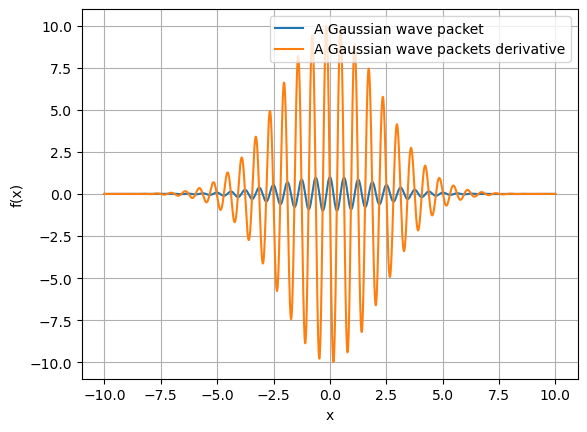

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#define the function
def f(x, a=0.1, b=10): 
    return np.cos(b*x)*np.exp(-a*x**2)
#define the derivative of the function
def df(x, a=0.1, b=10): 
    #return -b*np.sin(b*x)*np.exp(-a*x**2) - 2*a*x*np.cos(b*x)*np.exp(-a*x**2)
    term1=-b*np.sin(b*x)*np.exp(-a*x**2)
    term2=-2*a*x*np.cos(b*x)*np.exp(-a*x**2)
    return term1 + term2
#####other soulution is using this : 
#def plot_function(fun, x_min, x_max,a=0.1, b=10,  num_points=1000):
#    x = np.linspace(x_min, x_max, num_points)
#    y = fun(x, a, b)
#    plt.figure(figize=(10,6))
#plt.plot(x,y,label=f'f(x), a={a}, b={b}')
#plt.title('Plot of the function')
#plt.xlabel('x')
#plt.ylabel('f(x)')
#plt.grid()
#plt.legend()
#plt.show()

#plot the function and its derivative
x = np.linspace(-10,10, 1000000)  
plt.plot(x,f(x), label="A Gaussian wave packet")      
plt.plot(x, df(x), label="A Gaussian wave packets derivative")   
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()  

part 2: The analytical derivative 


In [10]:
#the df function is defined above
#test the analytical derivative at a specific point(can be any point just change the values of them..)
x_test=1
a_value=0.1
b_value=10
df_analytical=df(x_test, a=a_value, b=b_value)
print(f"The analytical derivative at x={x_test} is {df_analytical} ")

The analytical derivative at x=1 is 5.074351236525322 


part3: forword difference method


In [11]:
def forward_difference(f, x, h, *args ):
    return (f(x + h, *args) - f(x, *args)) / h    

#using args to pass additional parameters a and b to the function f
x_point=1.0
h_step=1e-2  #step size

forward_diff=forward_difference(f, x_point, h_step, a_value, b_value)
print(f"The forward difference approximation at x={x_point} with h={h_step} is {forward_diff} ")
#check that the forward difference is close to the analytical derivative
#renaming the variable for clarity
analytical_results=df_analytical
print(f"analytical solution for f'(x) at x={x_point} is {analytical_results:.6f}")
print(f"Absolut difference between analytical and forward difference: {abs(forward_diff - analytical_results):.6f}")
if abs(forward_diff - analytical_results) < 1e-3: 
    #used 1e-3 insted of 1e-2 to make sure the result is more accurate
    print("The forward difference approximation is close to the analytical derivative.")
else:
    print("The forward difference approximation is NOT close to the analytical derivative.")    
    




The forward difference approximation at x=1.0 with h=0.01 is 5.435423085794688 
analytical solution for f'(x) at x=1.0 is 5.074351
Absolut difference between analytical and forward difference: 0.361072
The forward difference approximation is NOT close to the analytical derivative.


part 4: central difference method

In [ ]:
# Make sure to run the cell where 'f' is defined before running this cell.

def central_difference(f, x, h, *args):
    # Use central difference formula to estimate the derivative

    return (f(x + h, *args) - f(x - h, *args)) / (2 * h)
#using args to pass additional parameters a and b to the function f

central_diff_estimate =central_difference(f, x_point, h_step, a_value, b_value)
#print the result
print(f"The central difference approximation at x={x_point} with h={h_step} is {central_diff_estimate:.6f} ")
# compare with analytical result
print(f"analytical solution for f'(x) at x={x_point} is {analytical_results:.6f}")
print(f"Absolut difference between analytical and central difference: {abs(central_diff_estimate - analytical_results):.6f}")
if abs(central_diff_estimate - analytical_results) < 1e-3:
        #used 1e-3 insted of 1e-2 to make sure the result is more accurate  

    print("The central difference approximation is close to the analytical derivative.")   
else:
    print("The central difference approximation is NOT close to the analytical derivative.")
    # Note: Central difference is generally more accurate than forward difference for the same step size h.
    

The central difference approximation at x=1.0 with h=0.01 is 5.065352 
analytical solution for f'(x) at x=1.0 is 5.074351
Absolut difference between analytical and central difference: 0.008999
The central difference approximation is NOT close to the analytical derivative.


Part 5: Quantifying the error 


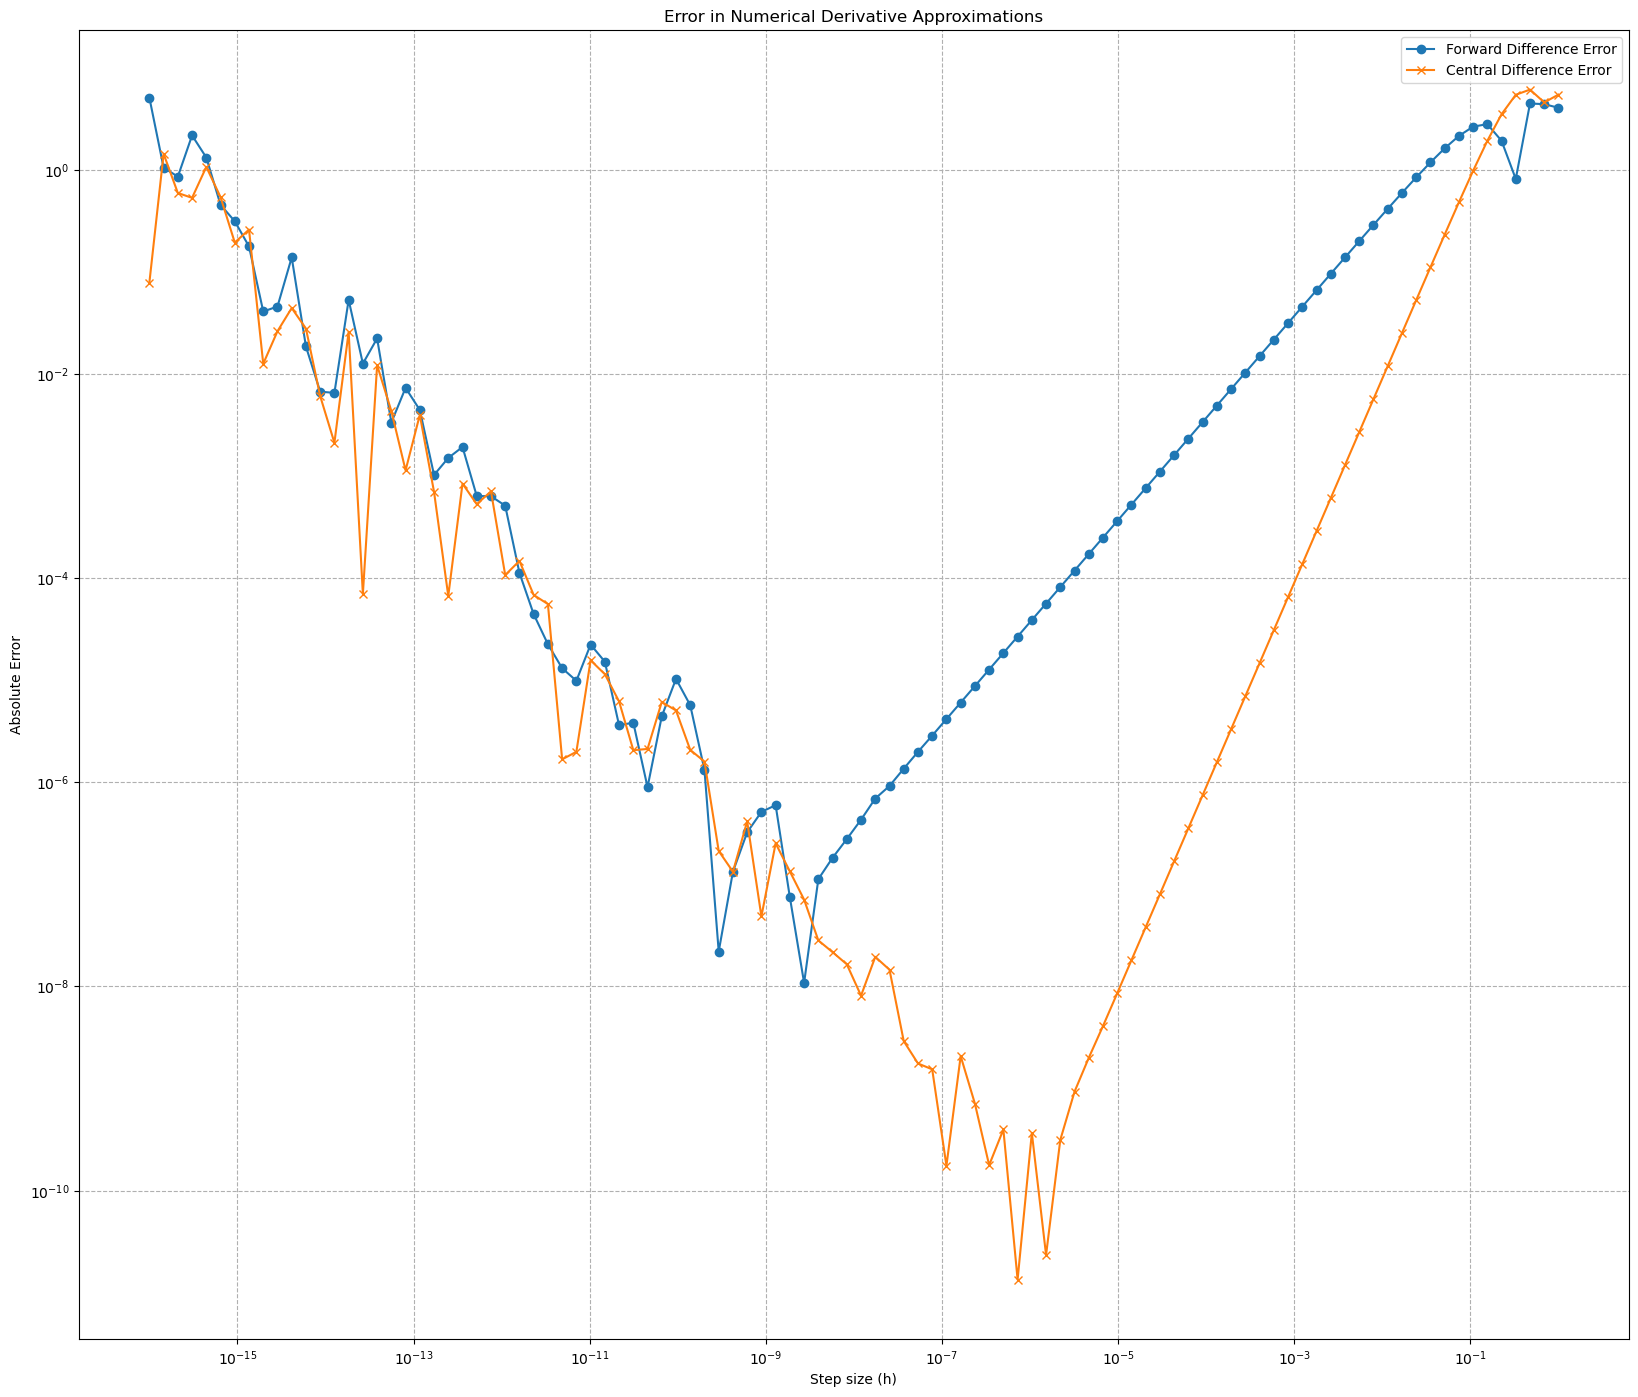

Minimum Forward Difference Error: 1.083295e-08 at h=2.718588e-09
Minimum Central Difference Error: 1.343903e-11 at h=7.220809e-07


In [21]:
#step sizes to 

#h_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10] #from 10^-1 to 10^-10
h_values=np.logspace(-16, 0, num=100)  #from 10^-16 to 10^0
#analytical derivative at the point of interest 
analytical_derivative = df(x_point, a=a_value, b=b_value)
#store errors for each method 
forward_errors = [] 
central_errors = []
for h in h_values:
    #compute the approximations for each h value 
    forward_approx = forward_difference(f, x_point, h, a_value, b_value)
    central_approx = central_difference(f, x_point, h, a_value, b_value)
    #compute and store the errors 
    forward_errors.append(abs(forward_approx - analytical_derivative))
    central_errors.append(abs(central_approx - analytical_derivative))
#convert to numpy arrays for easier handling  
forward_errors = np.array(forward_errors)
central_errors = np.array(central_errors)   
#plotting the errors on a log-log scale
plt.figure(figsize=(20,17)) 
plt.loglog(h_values, forward_errors, label='Forward Difference Error', marker='o')
plt.loglog(h_values, central_errors, label='Central Difference Error', marker='x')
# Reference lines for O(h) and O(h^2) convergence rates 
#plt.loglog(h_values, h_values, 'k--', label='O(h)', alpha=0.5)
#plt.loglog(h_values, h_values**2, 'r--', label='O(h^2)', alpha=0.5)
# Adding labels and legend 
plt.xlabel('Step size (h)')
plt.ylabel('Absolute Error')
plt.title('Error in Numerical Derivative Approximations')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
# Analyze the results
min_forward_error = np.min(forward_errors)
min_central_error = np.min(central_errors)
optimal_h_forward = h_values[np.argmin(forward_errors)]
optimal_h_central = h_values[np.argmin(central_errors)]
# Print the results
print(f"Minimum Forward Difference Error: {min_forward_error:.6e} at h={optimal_h_forward:.6e}")
print(f"Minimum Central Difference Error: {min_central_error:.6e} at h={optimal_h_central:.6e}")    

# The optimal h values indicate the step sizes where the numerical approximations are most accurate.
# The central difference method typically achieves a lower minimum error compared to the forward difference method, demonstrating its higher accuracy for the same step size.


observation : for large h values, the error is dominated by truncation error, which decreases as h decreases. However, for very small h values, round-off error becomes significant due to the limitations of floating-point precision in computers, causing the error to increase again. This results in a U-shaped error curve when plotted against h on a log-log scale. The optimal h is where the total error (truncation + round-off) is minimized.

exercise 4:

exercise 5: 

In [8]:
%pip install rockhound
%pip install cmocean
# Import necessary libraries 
import rockhound as rh 
import matplotlib.pyplot as plt
import cmocean as cmo #we have it in the task as comocean.cm.ice
import numpy as np

#fetch the bedmap2 dataset for thickness and surface, and bed 
bedmap = rh.fetch_bedmap2(thickness=True, surface=True, bed=True)
#explore the dataset
#create a figure and an axes object for plotting
plt.figure(figsize=(10,8))
ax=plt.subplot(111)
#plot the surface data as a pcolormesh
#bedmap.surface.plot.pcolormesh(ax=ax, cmap=cmo.cm.ice, vmin=-2000, vmax=2000)
bedmap.surface.plot.pcolormesh(ax=ax, cmap=cmo.cm.ice, cbar_kwargs=dict(pad=0.01, aspect=30))   #add a colorbar

#add a colorbar
#set the title
plt.title('Bedmap2 antarctic ')
#adjust the layout to prevent overlap
plt.tight_layout()
#show the plot
plt.show()





Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


TypeError: fetch_bedmap2() missing 1 required positional argument: 'datasets'

self reflections: 

References: 